In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=17WwtkoQXmh-aakunX52RTTADaZ2OAw9K' # The shareable link
fluff, id = link.split('=')

In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('ASX200Monthly.csv')

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from sklearn.linear_model import LinearRegression

In [18]:
# Reading data
monthly_data = pd.read_csv('ASX200Monthly.csv')
print(monthly_data.head())

         Date         Open         High  ...        Close    Adj Close  Volume
0  2000-02-29          NaN          NaN  ...          NaN          NaN     NaN
1  2000-03-31  3133.800049  3201.399902  ...  3115.800049  3115.800049     0.0
2  2000-04-30  3115.800049  3131.899902  ...  3081.000000  3081.000000     0.0
3  2000-05-31  3079.500000  3313.800049  ...  3311.199951  3311.199951     0.0
4  2000-06-30  3304.000000  3337.399902  ...  3251.100098  3251.100098     0.0

[5 rows x 7 columns]


In [19]:
# Converting to a time series
monthly_data['Date'] = pd.to_datetime(monthly_data['Date'])
monthly_data.set_index('Date', inplace = True)
monthly_ts = pd.Series(monthly_data['Close'])
print(monthly_ts.head())

Date
2000-02-29            NaN
2000-03-31    3115.800049
2000-04-30    3081.000000
2000-05-31    3311.199951
2000-06-30    3251.100098
Name: Close, dtype: float64


In [20]:
# Checking data for missing values
print('Before data cleaning ->')
print('No. of missing values in monthly data:', sum(monthly_ts.isna()))

Before data cleaning ->
No. of missing values in monthly data: 1


In [0]:
# Removing missing values
monthly_ts.dropna(inplace=True)

In [22]:
# Checking data for missing values again
print('After data cleaning ->')
print('No. of missing values in monthly data:', sum(monthly_ts.isna()))

After data cleaning ->
No. of missing values in monthly data: 0


In [23]:
# Descriptive statistics
print('Monthly data ->')
print(monthly_ts.describe())

Monthly data ->
count     228.000000
mean     4659.366239
std      1015.291733
min      2800.899902
25%      3707.975037
50%      4758.649902
75%      5483.850098
max      6754.100098
Name: Close, dtype: float64


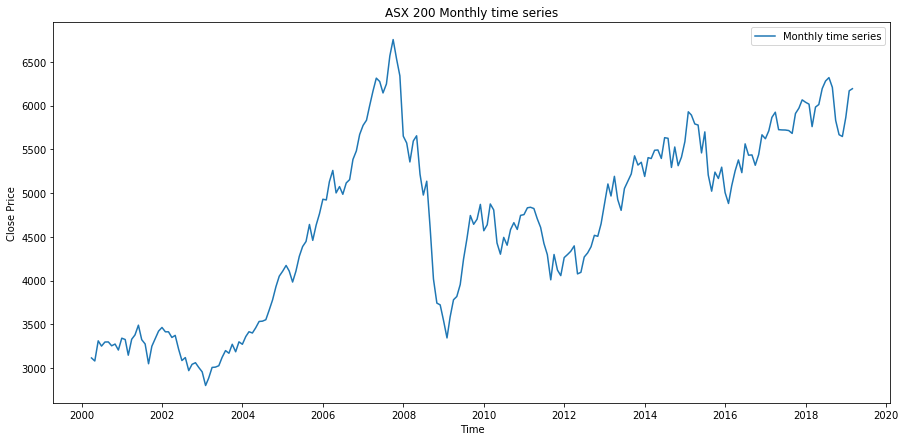

In [24]:
# Setting figure width and height
rcParams['figure.figsize'] = 15, 7

# Plotting time series
plt.plot(monthly_ts, label = "Monthly time series")
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('ASX 200 Monthly time series')
plt.legend()

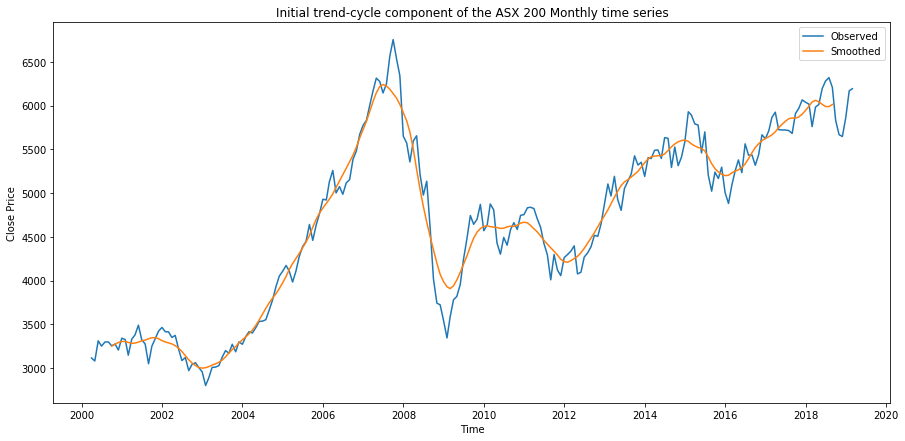

In [25]:
# Smoothing data by using CMA-12 to calculate the initial trend-cycle estimate
trend_cycle = monthly_ts.rolling(2, center=True).mean().rolling(12, center=True).mean().shift(-1)

plt.plot(monthly_ts, label = "Observed")
plt.plot(trend_cycle, label = "Smoothed")
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Initial trend-cycle component of the ASX 200 Monthly time series')
plt.legend()

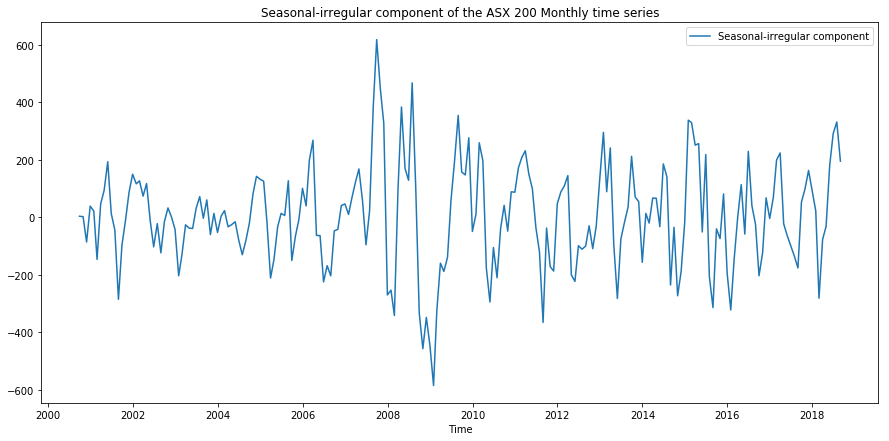

In [26]:
# Calculating the seasonal-irregular component
seasonal = monthly_ts - trend_cycle

#plt.plot(monthly_ts, label = "Observed")
plt.plot(seasonal, label = "Seasonal-irregular component")
plt.xlabel('Time')
#plt.ylabel('Close Price')
plt.title('Seasonal-irregular component of the ASX 200 Monthly time series')
plt.legend()